# Recitation W14 (Linear Regression)

**Instructor:** Asst. Prof. Nadi Serhan Aydın (Istinye University, Department of Industrial Engineering)

*Credits: Kevin Markham*

(This notebook can be run locally on Jupyter, or online using platforms such as [Google Colab](https://colab.research.google.com/).)

In [291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Example: Systolic Blood Pressure Data

Let's take a look at some data, ask some questions about that data, and then use linear regression to answer those questions!

In [292]:
# read data into a DataFrame
data = pd.read_csv('sbp.csv', index_col=0)
data.head()

,Pressure,Age,Weight
1,132,52,173
2,143,59,184
3,153,67,194
4,162,73,211
5,154,64,196


What are the **features**?
- Age in years
- Weight in pounds

What is the **response**?
- Blood pressure

In [293]:
# print the shape of the DataFrame
data.shape

(11, 3)

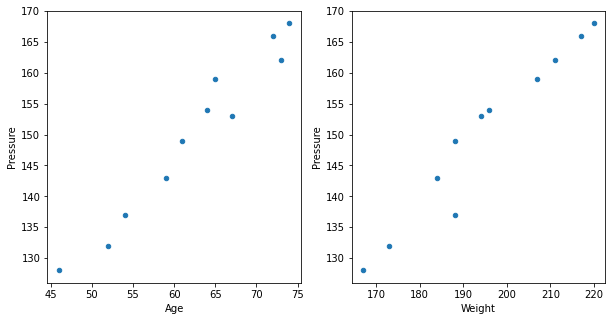

In [294]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 2)
data.plot(kind='scatter', x='Age', y='Pressure', ax=axs[0], figsize=(10, 5))
data.plot(kind='scatter', x='Weight', y='Pressure', ax=axs[1])

## Departing Questions

Let's pretend that you work for a public health institution. You want to find answers to following questions.

1. Is there is a relationship between age/weight and blood pressure?
2. What is the effect of each independent variable on blood pressure?
3. How strong/significant is that relationship?
4. Given age/weight of a person, can we predict his/her blood pressure?

## Simple Linear Regression

Simple linear regression is an approach for predicting a quantitative **response** using a **one or more features** (or "regressors" or "predictors" or "input variables" or "independent variables"). It takes the following form:

$y = \beta_0 + \beta_1x_1 + \dots + \beta_nx_n + \epsilon$

What does each term represent?
- $y$ is the response
- $x_1,\dots,x_n$ are features
- $\beta_0$ is the *population* intercept coefficient
- $\beta_1,\dots,\beta_n$ are the *population* slope coefficients for $x_1,\dots,x_n$
- $\epsilon$ is the *population* error/residual/innovation term

To create our model, we must **estimate** the values of these coefficients based on available data. And once we've estimated these coefficients, we can use the model to **predict** blood pressure for some $x$ values that are in our sample (**in-sample prediction** or **training**) or not even in our sample (**out-of-sample prediction** or **test**).

## Estimating (or *Learning*) Model Coefficients

Now, assume we have a data set of $N$ observations. Model oefficients are generally estimated using the ordinary **Least Squares Method**, which means we are estimating the regression line that minimizes the **sum of squared errors** or $$SSE=\sum_{i=1}^N (y_i-\hat{y})^2=\sum_{i=1}^N e_i^2$$

SciPy's `linregress` function (see W14 slides) can only be used on one-variable regressions. Alternatively, we can use `statsmodels` to estimate the model coefficients for the advertising data:

In [295]:
import statsmodels.formula.api as smf

# Fit a regression model
reg_line = smf.ols(formula='Pressure ~ Age + Weight', data=data).fit()

# Print the model coefficients or a summary table
reg_line.params
#print(reg_line.summary())

Intercept    30.994103
Age           0.861415
Weight        0.334859
dtype: float64

## Interpreting Model Coefficients

How do we interpret the Age and Weigth coefficients ($b_1$ and $b_2$) estimated from our example?
- A unit increase in age is **associated with** a `0.861415` unit increase in blood pressure (when weight is constant).
- A unit increase in weight is **associated with** a `0.334859` unit increase in blood pressure (when age is constant).

Note that if an increase in age (or weight) were associated with a **decrease** in blood pressure, $b_1$ (or $b_2$) would be **negative**.

## Using the Model for Prediction

Let's assume that a new person (person $N+1$) shows up with an age of $50$ years and weight of 160 pounds. What would be your point prediction for his/her blood pressure?

$$\hat{y} = b_0 + b_1x_1 + b_2x_2$$

$$\hat{y} = 30.994103 + 0.861415(50) + 0.334859(160)$$

In [296]:
# Manually calculate the prediction
30.994103 + 0.861415*50 + 0.334859*160

127.642293

Thus, we would predict a blood pressure of $\hat{y}=127.642293$ units for that $(N+1)$th person. You may then make a  measurement and see that $y=130$ for that person. This means your prediction carries an error of $e=2.357707$ units for that specific observation). 
<!-- This prediction process is also called **interpolation** (if new $x$ is *inside* the range) or **extrapolation** (if new $x$ is *outside* the range) -->

Of course, we can also use `statsmodels` as follows to make this prediction:

In [297]:
# First, generate a dataframe for the new observation
x_new = pd.DataFrame({'Age': [50],'Weight': [160]})
x_new

,Age,Weight
0,50,160


In [298]:
# Use the model to make predictions on the new value
reg_line.predict(x_new)

0    127.642309
dtype: float64

## Plotting the Least Squares Line

Now we see how to plot the regression line against the real data. For illustration purposes, we do this for a single-variable model. Let's first make predictions for the **smallest and largest observed values of x**, and then use the predicted values to plot the least squares line:

In [299]:
# Let's first regress Blood Pressure on Age (or Weight) 
reg_line = smf.ols(formula='Pressure ~ Age', data=data).fit()
# We'll plot the regression line between min and max Age values
x_new = pd.DataFrame({'Age': [data.Age.min(), data.Age.max()]})
x_new

,Age
0,46
1,74


In [300]:
# Make predictions for those x values and store them
preds = reg_line.predict(x_new)
preds

0    126.014117
1    166.984570
dtype: float64

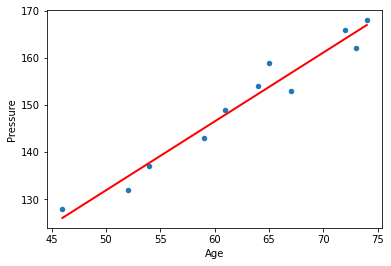

In [301]:
# First, scatter-plot the observed data
data.plot(kind='scatter', x='Age', y='Pressure')

# Then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

## Confidence Intervals for Population Coefficients

<!-- **Question:** Is linear regression a high bias/low variance model, or a low bias/high variance model? -->

<!-- **Answer:** High bias/low variance. Under repeated sampling, the line will stay roughly in the same place (low variance), but the average of those models won't do a great job capturing the true relationship (high bias). Note that low variance is a useful characteristic when you don't have a lot of training data! -->

It is good to recall few points:

- $B_0$ and $B_1$ are estimators of population parameters $\beta_0$ and $\beta_1$
- This means $B_0$ and $B_1$ have their own sampling distributions (It is Student's $t$ distribution.).
- Coefficients $b_0$ and $b_1$ are realizations of $B_0$ and $B_1$ estimated from a certain sample
- We can indeed use $b_0$ and $b_1$ to make inferences about $\beta_0$ and $\beta_1$ (e.g., build confidence intervals, carry out hypothesis tests, etc.)
- But for this class, we will not *manually* calculate $t$ values or derive confidence intervals for $\beta_0$ and $\beta_1$. We'll only interpret outputs from `scipy`, `statsmodels` or `sklearn`.

By default `statsmodels` calculates two-sided 95% confidence intervals for our model coefficients, but we can change it to any $\alpha$ value we want. We can create 90% confidence intervals (which would be be more narrower) or 99% confidence intervals (which would be wider), or whatever intervals we like.

In [302]:
# Estimate our regression parameters again
reg_line = smf.ols(formula='Pressure ~ Age + Weight', data=data).fit()
# Then, print the confidence intervals for the model coefficients
reg_line.conf_int(alpha=0.05)

,0,1
Intercept,3.451696,58.536510
Age,0.288992,1.433837
Weight,0.033538,0.636181


## Hypothesis Testing and P-value Approach

<!-- Closely related to confidence intervals is **hypothesis testing**. Generally speaking, you start with a **null hypothesis** and an **alternative hypothesis** (that is opposite the null). Then, you check whether the data supports **rejecting the null hypothesis** or **failing to reject the null hypothesis**. -->

<!-- (Note that "failing to reject" the null is not the same as "accepting" the null hypothesis. The alternative hypothesis may indeed be true, except that you just don't have enough data to show that.) -->

`statsmodels` can report 2-sided P-values for testing the below 2-sided hypothesis regarding model coefficients.

$H_0: \beta_1=0$, i.e., there **is no** significant relationship between Age and Blood Pressure<br>
$H_1: \beta_1\neq0$, i.e., there **is** significant relationship between Age and Blood Pressure

(The same hypothesis can be asserted for Weight as well) Intuitively, we can reject the null hypothesis if the 95% confidence interval **does not include zero** (check the confidence itnervals above). Conversely, the **P-value approach** can be used to reject or not reject the null hypothesis. For example, if the P-value for Age is far less than  $\alpha=0.05$, then we can accept $H_1$, that is, there is a significant relationship between Age and Blood Pressure.

In [303]:
# Print the P-values for the model coefficients
reg_line.pvalues

Intercept    0.031865
Age          0.008440
Weight       0.033508
dtype: float64

<!-- If the 95% confidence interval **includes zero**, the p-value for that coefficient will be **greater than 0.05**. If the 95% confidence interval **does not include zero**, the p-value will be **less than 0.05**. Thus, a p-value less than 0.05 is one way to decide whether there is likely a relationship between the feature and the response. (Again, using 0.05 as the cutoff is just a convention.) -->

<!-- If the p-value for Age is far less than $\alpha=0.05$ (one-sided test) or $\alpha/2=0.025$ (one-sided test), then we **believe** that there is a significant relationship between Age and Pressure. -->

Accordingly, for all coefficients (namely, `Intercept`, `Age` and `Weight`), $H_0$ can be rejected (but most strongly for `Age`).

Note however that we generally ignore the P-value (or hypothesis test) concerning the intercept.

## Measure of Fit

The most common way to evaluate the overall fit of a linear model is by the **R-squared** value (again, refer to W14 slides). R-squared is the **proportion of variance explained**, meaning the proportion of variance in the observed data that is explained by the model.
<!-- , or the reduction in error over the **null model**. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.) -->

$R^2$ is between 0 and 1, and higher $R^2$ values are better, meaning that more variance is explained by the model.

Let's calculate the $R^2$ value for our simple linear model:

In [304]:
# Print the R-squared value for different models.
reg_line1 = smf.ols(formula='Pressure ~ Age', data=data).fit()
reg_line2 = smf.ols(formula='Pressure ~ Weight', data=data).fit()
reg_line3 = smf.ols(formula='Pressure ~ Age + Weight', data=data).fit()
print('Model 1: %.4f\nModel 2: %.4f\nModel 3: %.4f' % (reg_line1.rsquared,reg_line2.rsquared,reg_line3.rsquared))

Model 1: 0.9578
Model 2: 0.9420
Model 3: 0.9768


Again, remember that $R^2$ should not be used for comparing models with different number of regressors (because adding new regressors lead to articially higher values of $R^2$ and causes **overfitting** and this is true even if they are unrelated to the response $Y$). 
<!-- Is that a "good" R-squared value? It's hard to say. The threshold for a good R-squared value depends widely on the domain.  -->
<!-- Therefore, it's most useful as a tool for **comparing different models**. -->

**R-squared will always increase as you add more features to the model**, even if they are unrelated to the response. Thus, selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.

There is alternative to R-squared called **adjusted R-squared** that penalizes model complexity to control for overfitting (Adjusted $R^2$ is reported in the regression summary table obtained using `reg_line.summary()` command.).

<!-- but it generally [under-penalizes complexity](http://scott.fortmann-roe.com/docs/MeasuringError.html). -->

<!-- So is there a better approach to feature selection? **Cross-validation.** It provides a more reliable estimate of out-of-sample error, and thus is a better way to choose which of your models will best **generalize** to out-of-sample data. There is extensive functionality for cross-validation in scikit-learn, including automated methods for searching different sets of parameters and different models. Importantly, cross-validation can be applied to any model, whereas the methods described above only apply to linear models. -->

## Linear Regression in scikit-learn

Let's see how `sklearn` can be used to perform some of the steps above.

In [305]:
# Generate x and y
feature_cols = ['Age', 'Weight']
x = data[feature_cols]
y = data.Pressure

# Use sklearn to fit regression line
from sklearn.linear_model import LinearRegression
reg_line = LinearRegression()
reg_line.fit(x, y)

# Print intercept and coefficients
print(reg_line.intercept_)
print(reg_line.coef_)

30.994102952348328
[0.86141469 0.3348592 ]


In [306]:
# Predict for a new observation
reg_line.predict([[50,160]])

array([127.64230882])

In [307]:
# Calculate the R-squared
lm.score(x, y)

0.9768471041502093

Finally, note that **p-values** and **confidence intervals** are not (easily) accessible through `scikit-learn`.